In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)

In [23]:
df = pd.read_csv('carclaims.csv')
print(df.shape)
df.head()

(15420, 33)


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [24]:
df.drop('PolicyNumber', axis=1, inplace=True)
df.shape

(15420, 32)

In [25]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,16.000000,700.000000,4.000000,1996.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  RepNumber             15420 non-null

### Target

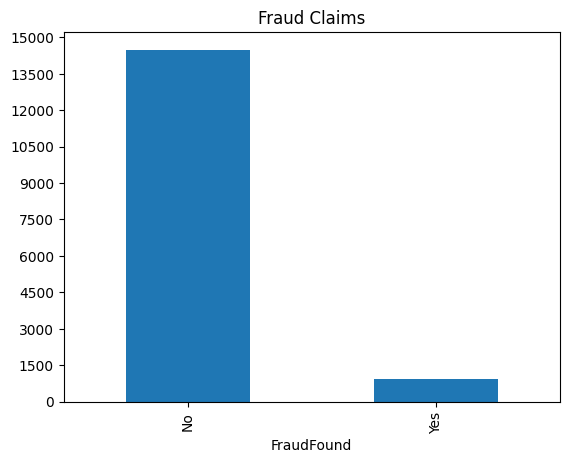

In [27]:
df['FraudFound'].value_counts().plot(kind='bar')
plt.title('Fraud Claims')
plt.yticks(np.arange(0, 16000, 1500))
plt.show()

Need to oversample minority class: "Yes" FraudFound or 
undersample majority class: "No"

### Variable Type

#### Numerical

In [28]:
num_var = [var for var in df.columns if df[var].dtype != 'O']
print(len(num_var))
num_var

7


['WeekOfMonth',
 'WeekOfMonthClaimed',
 'Age',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Year']

Year
1994    6142
1995    5195
1996    4083
Name: FraudFound, dtype: int64


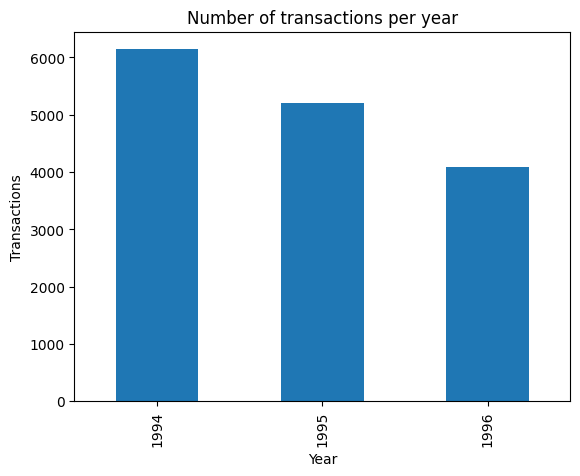

In [29]:
print(df.groupby("Year")['FraudFound'].size())
df.groupby("Year")['FraudFound'].size().plot(kind='bar')
plt.ylabel('Transactions')
plt.title('Number of transactions per year')
plt.yticks(np.arange(0,7000,1000))
plt.show()

Year  FraudFound
1994  No            5733
      Yes            409
1995  No            4894
      Yes            301
1996  No            3870
      Yes            213
dtype: int64


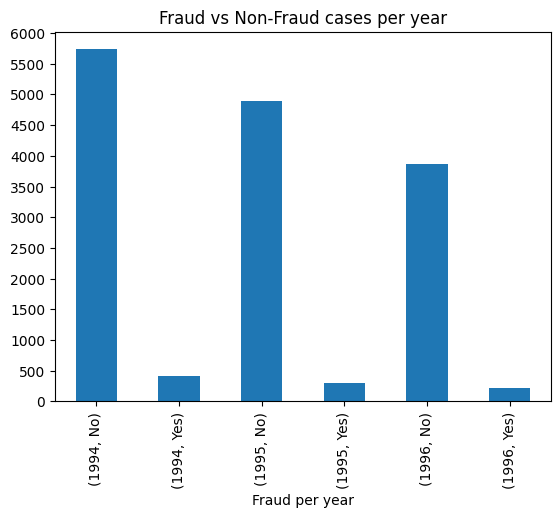

In [30]:
print(df.groupby(['Year','FraudFound']).size())
df.groupby(['Year','FraudFound']).size().plot(kind='bar')
plt.xlabel('Fraud per year')
plt.title('Fraud vs Non-Fraud cases per year')
plt.yticks(np.arange(0,6500,500))
plt.show()

WeekOfMonthClaimed
1    3450
2    3720
3    3583
4    3433
5    1234
Name: FraudFound, dtype: int64


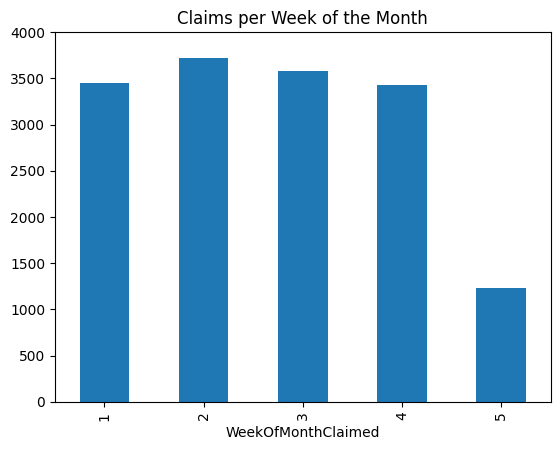

In [31]:
print(df.groupby('WeekOfMonthClaimed')['FraudFound'].size())
df.groupby('WeekOfMonthClaimed')['FraudFound'].size().plot(kind='bar')
plt.title('Claims per Week of the Month')
plt.yticks(np.arange(0, 4500, 500))
plt.show()

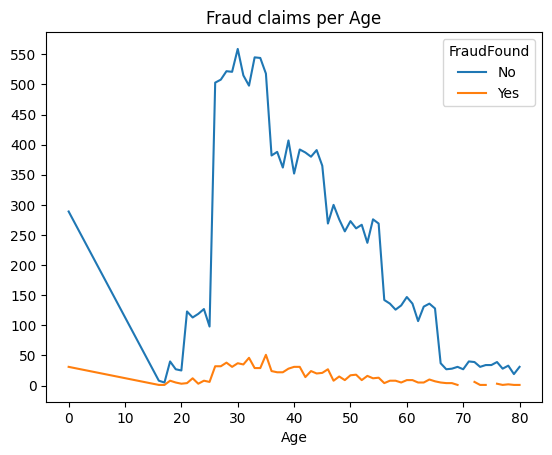

In [32]:
#df.groupby(['Age','FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='line')
df.groupby(['Age','FraudFound']).size().unstack('FraudFound').plot(kind='line')
plt.title('Fraud claims per Age')
plt.yticks(np.arange(0, 600, 50))
plt.show()

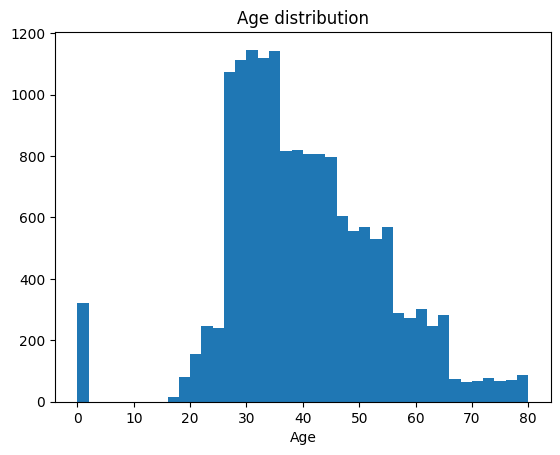

In [33]:
plt.hist(df['Age'], bins=40)
plt.title('Age distribution')
plt.xlabel('Age')
plt.show()

DriverRating
1    232
2    214
3    242
4    235
dtype: int64


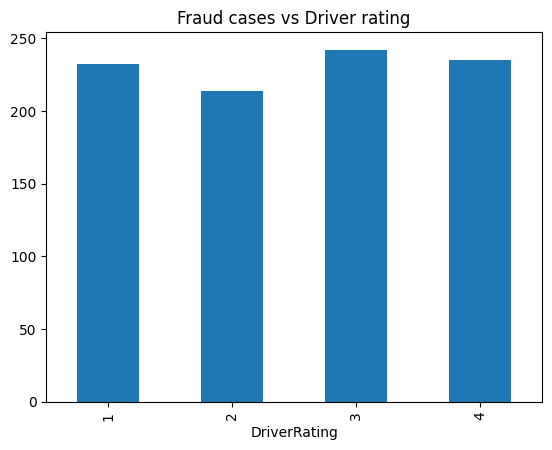

In [34]:
print(df.groupby(['DriverRating','FraudFound']).size().xs('Yes', level='FraudFound'))
df.groupby(['DriverRating','FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraud cases vs Driver rating')
plt.show()

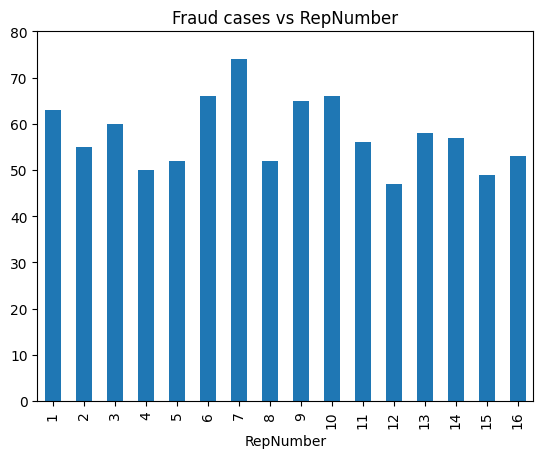

In [35]:
df.groupby(['RepNumber','FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraud cases vs RepNumber')
plt.yticks(np.arange(0, 85, 10))
plt.show()

Deductible
300      2
400    856
500     47
700     18
dtype: int64


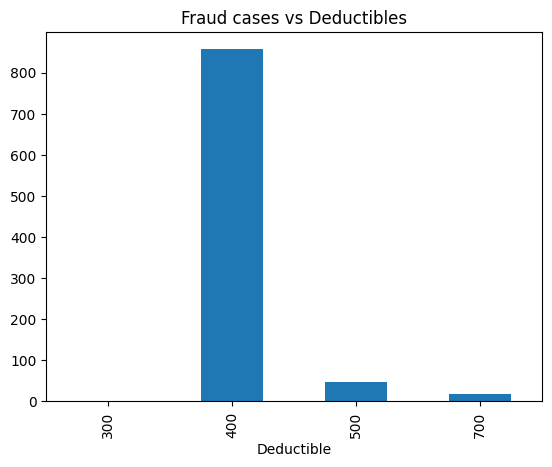

In [36]:
print(df.groupby(['Deductible','FraudFound']).size().xs('Yes', level='FraudFound'))
df.groupby(['Deductible','FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraud cases vs Deductibles')
plt.show()

#### Numerical - Discrete

In [37]:
discrete_var = [var for var in num_var if len(df[var].unique()) < 20 and 'Year' not in var]
print(len(discrete_var), 'discrete vars')
df[discrete_var].head()

5 discrete vars


,WeekOfMonth,WeekOfMonthClaimed,RepNumber,Deductible,DriverRating
0,5,1,12,300,1
1,3,4,15,400,4
2,5,2,7,400,3
3,2,1,4,400,2
4,5,2,3,400,1


#### Numerical - Continuous

In [38]:
cont_var = [var for var in num_var if var not in discrete_var]
print(len(cont_var), 'continuous vars')
df[cont_var].head()

2 continuous vars


,Age,Year
0,21,1994
1,34,1994
2,47,1994
3,65,1994
4,27,1994


#### Categorical

In [39]:
cat_var = [var for var in df.columns if var not in num_var and var != 'FraudFound']
print(len(cat_var))
cat_var

24


['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days:Policy-Accident',
 'Days:Policy-Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange-Claim',
 'NumberOfCars',
 'BasePolicy']

Make
Accura        59
BMW            1
Chevrolet     94
Dodge          2
Ford          33
Honda        179
Mazda        123
Mecedes        1
Mercury        6
Nisson         1
Pontiac      213
Saab          11
Saturn         6
Toyota       186
VW             8
dtype: int64


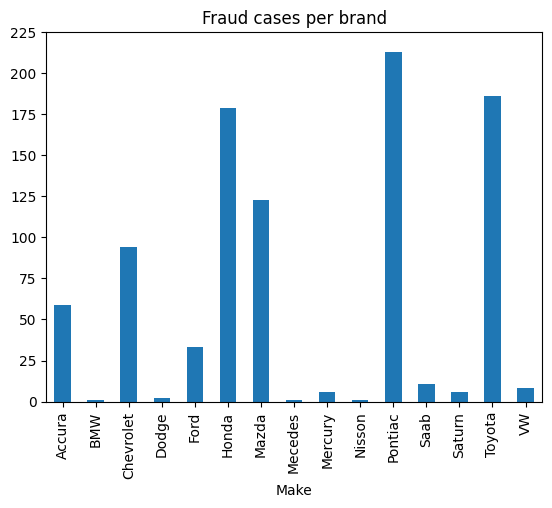

In [40]:
print(df.groupby(['Make', 'FraudFound']).size().xs('Yes', level='FraudFound'))
df.groupby(['Make', 'FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraud cases per brand')
plt.yticks(np.arange(0, 250, 25))
plt.show()

AccidentArea
Rural    133
Urban    790
dtype: int64


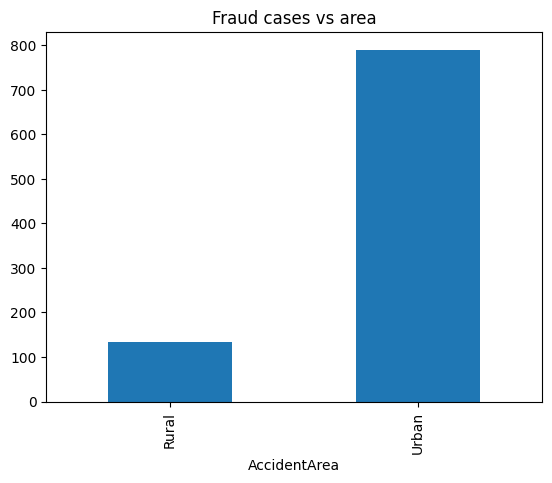

In [41]:
print(df.groupby(['AccidentArea', 'FraudFound']).size().xs('Yes', level='FraudFound'))
df.groupby(['AccidentArea', 'FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraud cases vs area')
plt.show()

DayOfWeekClaimed
Sunday         3
Monday       216
Tuesday      198
Wednesday    188
Thursday     144
Friday       164
Saturday      10
dtype: int64


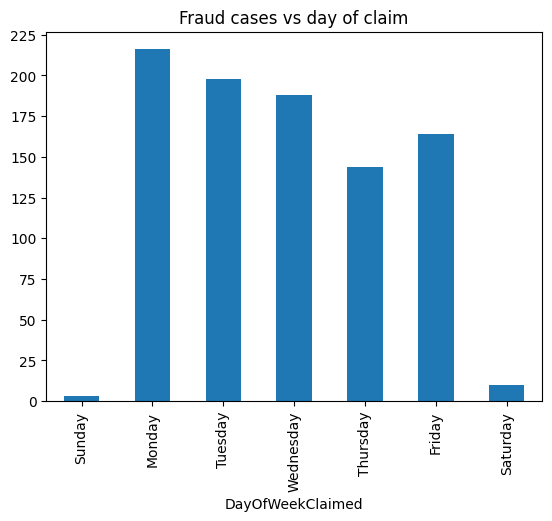

In [42]:
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
print(df.groupby(['DayOfWeekClaimed', 'FraudFound']).size().xs('Yes', level='FraudFound').reindex(days_order))
df.groupby(['DayOfWeekClaimed', 'FraudFound']).size().xs('Yes', level='FraudFound').reindex(days_order).plot(kind='bar')
plt.title('Fraud cases vs day of claim')
plt.yticks(np.arange(0, 250, 25))
plt.show()

MonthClaimed
Jan    92
Feb    78
Mar    97
Apr    82
Jun    78
Jul    56
Aug    92
Sep    78
Oct    73
Nov    46
Dec    49
dtype: int64


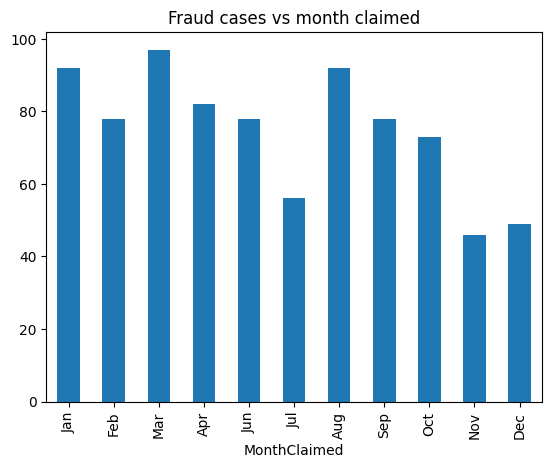

In [43]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
print(df.groupby(['MonthClaimed', 'FraudFound']).size().xs('Yes', level='FraudFound').reindex(month_order))
df.groupby(['MonthClaimed', 'FraudFound']).size().xs('Yes', level='FraudFound').reindex(month_order).plot(kind='bar')
plt.title('Fraud cases vs month claimed')
plt.show()

Sex
Female    105
Male      818
dtype: int64


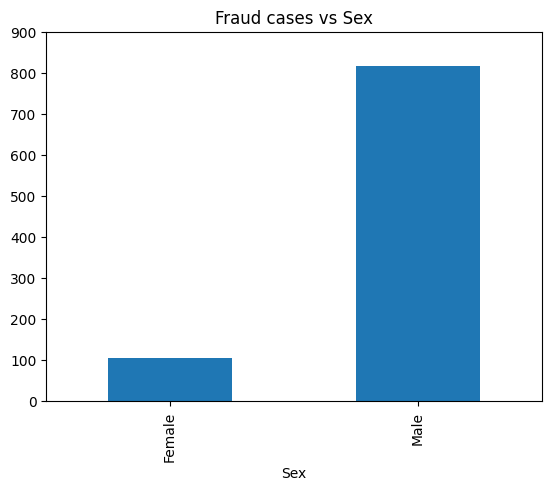

In [44]:
print(df.groupby(['Sex', 'FraudFound']).size().xs('Yes', level='FraudFound'))
df.groupby(['Sex', 'FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraud cases vs Sex')
plt.yticks(np.arange(0, 1000, 100))
plt.show()

MaritalStatus
Divorced      3
Married     639
Single      278
Widow         3
dtype: int64


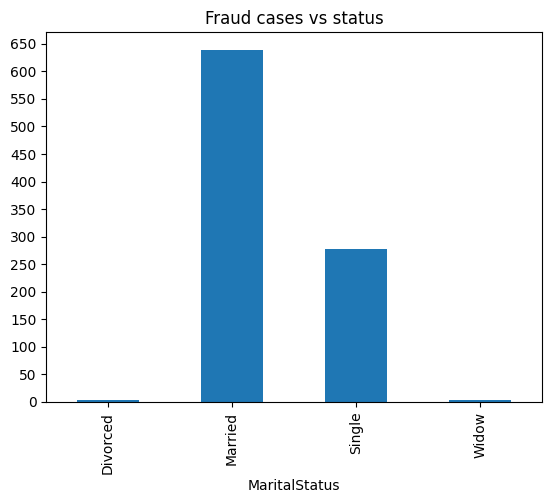

In [45]:
print(df.groupby(['MaritalStatus', 'FraudFound']).size().xs('Yes', level='FraudFound'))
df.groupby(['MaritalStatus', 'FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraud cases vs status')
plt.yticks(np.arange(0, 700, 50))
plt.show()

Fault
Policy Holder    886
Third Party       37
dtype: int64


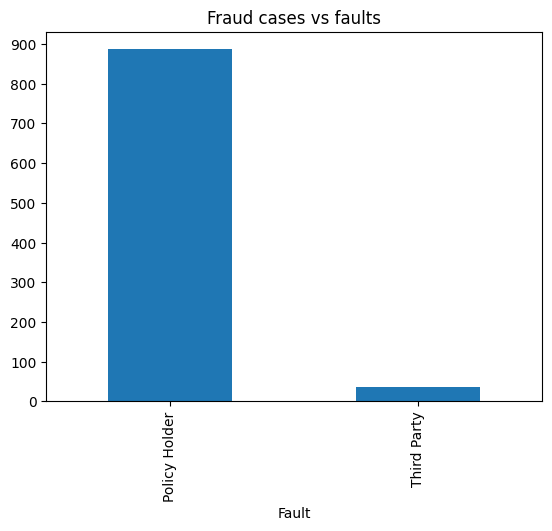

In [46]:
print(df.groupby(['Fault', 'FraudFound']).size().xs('Yes', level='FraudFound'))
df.groupby(['Fault', 'FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraud cases vs faults')
plt.yticks(np.arange(0, 1000, 100))
plt.show()

PolicyType
Sedan - All Perils      411
Sedan - Collision       384
Sedan - Liability        36
Sport - Collision        48
Utility - All Perils     41
Utility - Collision       3
dtype: int64


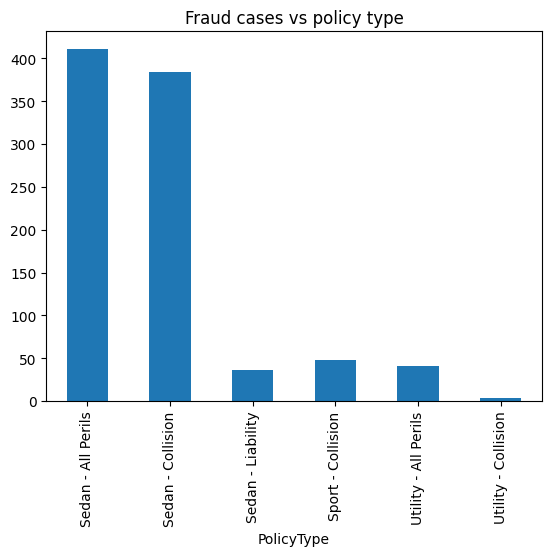

In [47]:
print(df.groupby(['PolicyType', 'FraudFound']).size().xs('Yes', level='FraudFound'))
df.groupby(['PolicyType', 'FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraud cases vs policy type')
plt.show()

VehicleCategory
Sedan      795
Sport       84
Utility     44
dtype: int64


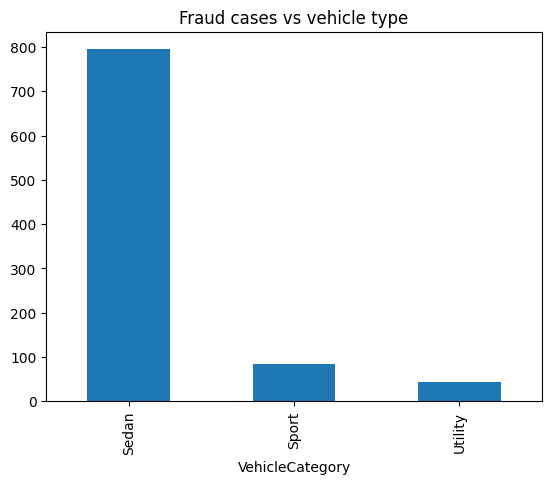

In [48]:
print(df.groupby(['VehicleCategory', 'FraudFound']).size().xs('Yes', level='FraudFound'))
df.groupby(['VehicleCategory', 'FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraud cases vs vehicle type')
plt.show()

VehiclePrice
less than 20,000    103
20,000 to 29,000    421
30,000 to 39,000    175
40,000 to 59,000     31
60,000 to 69,000      4
more than 69,000    189
dtype: int64


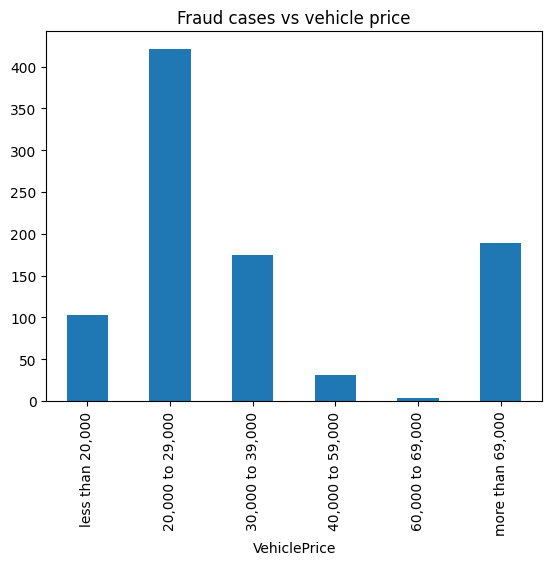

In [49]:
price_order = ['less than 20,000', '20,000 to 29,000', '30,000 to 39,000', '40,000 to 59,000', '60,000 to 69,000', 'more than 69,000']
print(df.groupby(['VehiclePrice', 'FraudFound']).size().xs('Yes', level='FraudFound').reindex(price_order))
df.groupby(['VehiclePrice', 'FraudFound']).size().xs('Yes', level='FraudFound').reindex(price_order).plot(kind='bar')
plt.title('Fraud cases vs vehicle price')
plt.show()

VehiclePrice          20,000 to 29,000  30,000 to 39,000  40,000 to 59,000  \
PolicyType                                                                   
Sedan - All Perils                2061               658                78   
Sedan - Collision                 3374              1386               159   
Sedan - Liability                 2637              1477               183   
Sport - All Perils                   6                 3                 0   
Sport - Collision                    0                 0                 0   
Sport - Liability                    0                 0                 0   
Utility - All Perils                 0                 9                35   
Utility - Collision                  1                 0                 4   
Utility - Liability                  0                 0                 2   

VehiclePrice          60,000 to 69,000  less than 20,000  more than 69,000  
PolicyType                                                      

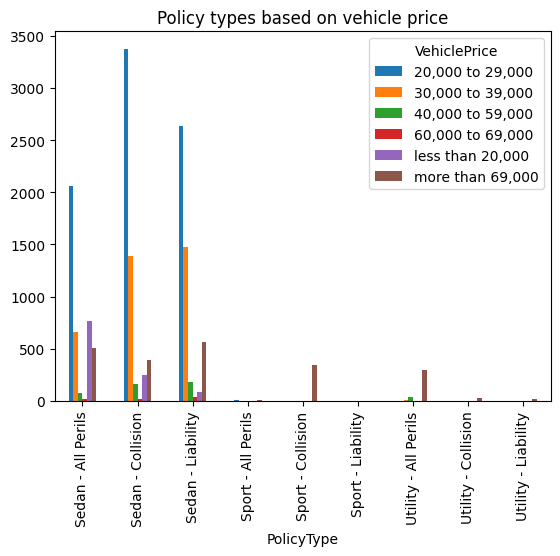

In [50]:
print(df.groupby(['PolicyType', 'VehiclePrice']).size().unstack(fill_value=0))
df.groupby(['PolicyType', 'VehiclePrice']).size().unstack(fill_value=0).plot(kind='bar')
plt.title('Policy types based on vehicle price')
plt.show()

Days:Policy-Accident
1 to 7            1
15 to 30          3
8 to 15           5
more than 30    905
none              9
dtype: int64


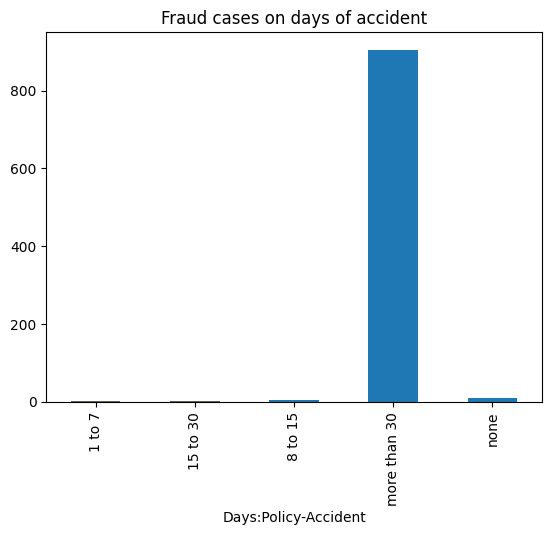

In [51]:
print(df.groupby(['Days:Policy-Accident', 'FraudFound']).size().xs('Yes', level='FraudFound'))
df.groupby(['Days:Policy-Accident', 'FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraud cases on days of accident')
plt.show()

Days:Policy-Claim
15 to 30          6
8 to 15           3
more than 30    914
dtype: int64


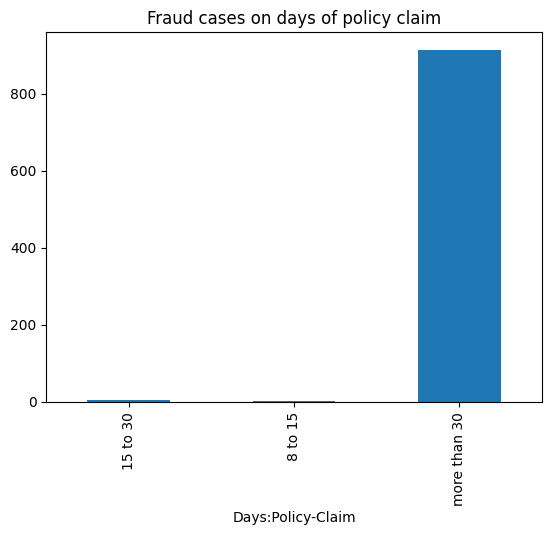

In [52]:
print(df.groupby(['Days:Policy-Claim', 'FraudFound']).size().xs('Yes', level='FraudFound'))
df.groupby(['Days:Policy-Claim', 'FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraud cases on days of policy claim')
plt.show()

PastNumberOfClaims
1              222
2 to 4         294
more than 4     68
none           339
dtype: int64


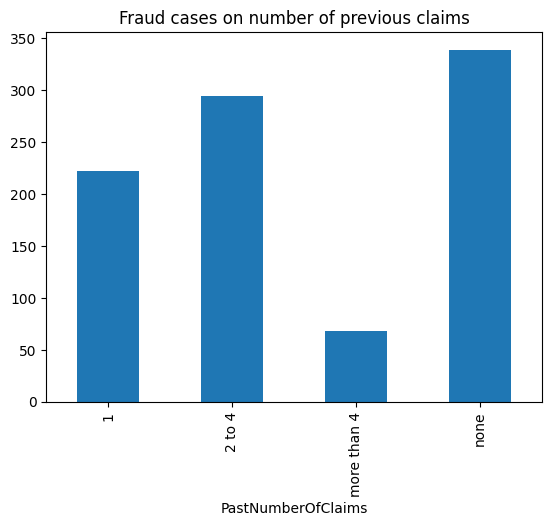

In [64]:
print(df.groupby(['PastNumberOfClaims', 'FraudFound']).size().xs('Yes', level='FraudFound'))
df.groupby(['PastNumberOfClaims', 'FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraud cases on number of previous claims')
plt.show()

AgeOfVehicle
2 years          3
3 years         13
4 years         21
5 years         95
6 years        228
7 years        325
more than 7    206
new             32
dtype: int64


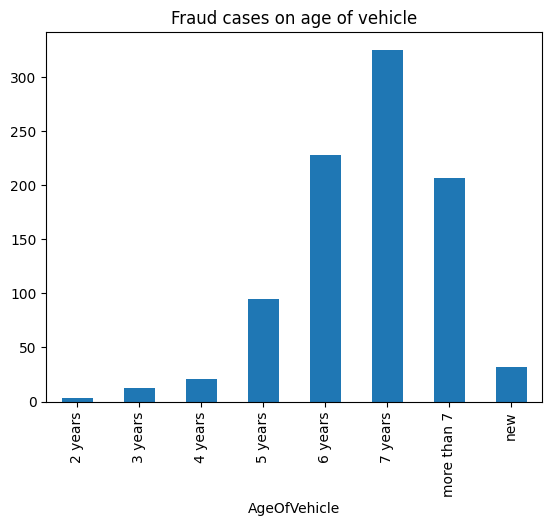

In [65]:
print(df.groupby(['AgeOfVehicle', 'FraudFound']).size().xs('Yes', level='FraudFound'))
df.groupby(['AgeOfVehicle', 'FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraud cases on age of vehicle')
plt.show()

AgeOfPolicyHolder
16 to 17     31
18 to 20      2
21 to 25     16
26 to 30     33
31 to 35    360
36 to 40    237
41 to 50    144
51 to 65     70
over 65      30
dtype: int64


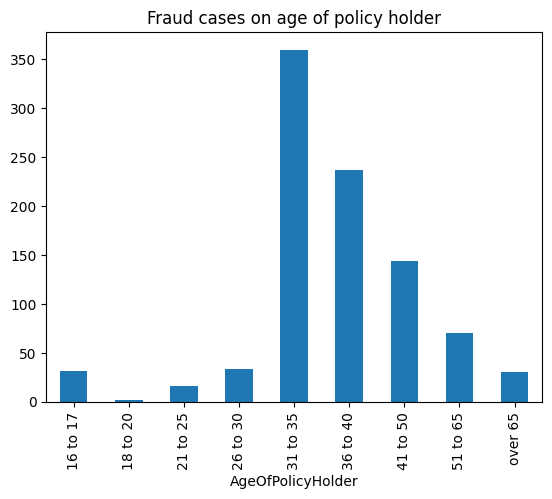

In [66]:
print(df.groupby(['AgeOfPolicyHolder', 'FraudFound']).size().xs('Yes', level='FraudFound'))
df.groupby(['AgeOfPolicyHolder', 'FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraud cases on age of policy holder')
plt.show()

In [56]:
df_yes = df[(df['FraudFound'] == 'Yes') 
   & (df['PoliceReportFiled'] == 'Yes') 
   & (df['WitnessPresent'] == 'Yes')]
df_yes.groupby(['PoliceReportFiled', 'WitnessPresent', 'AgentType']).size()


PoliceReportFiled  WitnessPresent  AgentType
Yes                Yes             External     1
dtype: int64

In [57]:
df_no = df[(df['FraudFound'] == 'Yes') 
   & (df['PoliceReportFiled'] == 'No') 
   & (df['WitnessPresent'] == 'No')]
df_no.groupby(['PoliceReportFiled', 'WitnessPresent', 'AgentType']).size()


PoliceReportFiled  WitnessPresent  AgentType
No                 No              External     901
                                   Internal       4
dtype: int64

NumberOfSuppliments
1 to 2         159
3 to 5          97
more than 5    195
none           472
dtype: int64


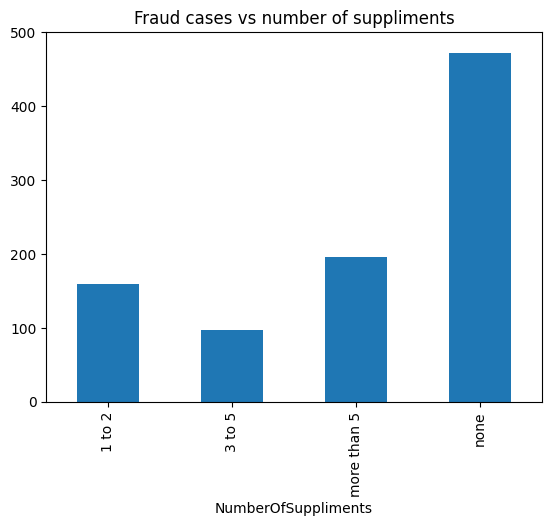

In [58]:
print(df.groupby(['NumberOfSuppliments', 'FraudFound']).size().xs('Yes', level='FraudFound'))
df.groupby(['NumberOfSuppliments', 'FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraud cases vs number of suppliments')
plt.yticks(np.arange(0, 600, 100))
plt.show()

AddressChange-Claim
1 year             11
2 to 3 years       51
4 to 8 years       33
no change         825
under 6 months      3
dtype: int64


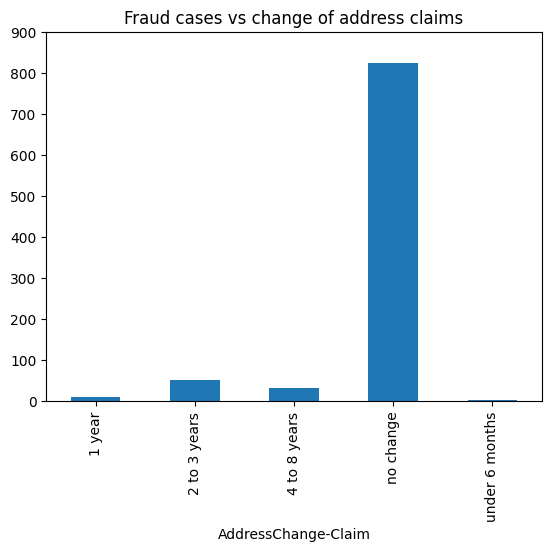

In [59]:
print(df.groupby(['AddressChange-Claim', 'FraudFound']).size().xs('Yes', level='FraudFound'))
df.groupby(['AddressChange-Claim', 'FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraud cases vs change of address claims')
plt.yticks(np.arange(0, 1000, 100))
plt.show()

NumberOfCars
1 vehicle     850
2 vehicles     43
3 to 4         29
5 to 8          1
dtype: int64


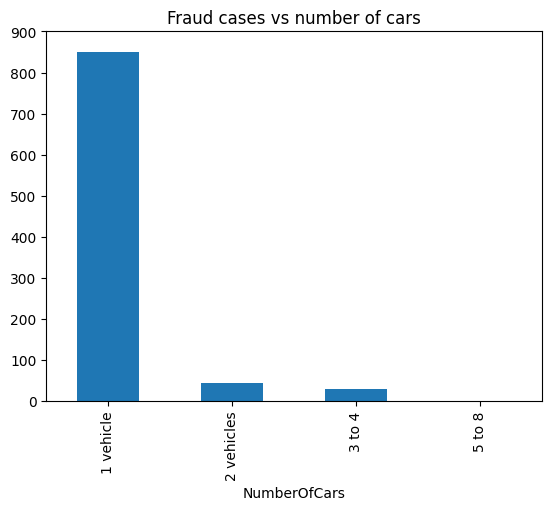

In [60]:
print(df.groupby(['NumberOfCars', 'FraudFound']).size().xs('Yes', level='FraudFound'))
df.groupby(['NumberOfCars', 'FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraud cases vs number of cars')
plt.yticks(np.arange(0, 1000, 100))
plt.show()

BasePolicy
All Perils    452
Collision     435
Liability      36
dtype: int64


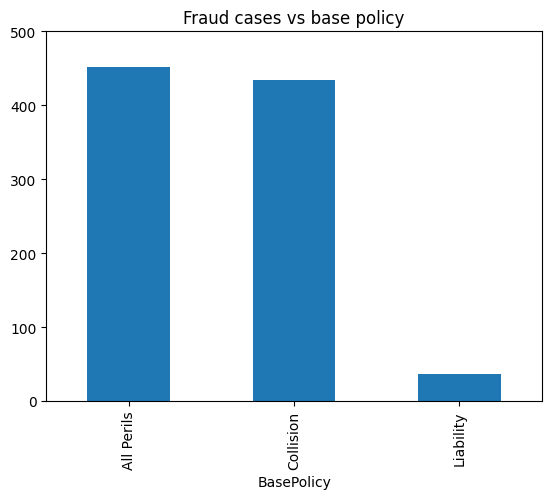

In [61]:
print(df.groupby(['BasePolicy', 'FraudFound']).size().xs('Yes', level='FraudFound'))
df.groupby(['BasePolicy', 'FraudFound']).size().xs('Yes', level='FraudFound').plot(kind='bar')
plt.title('Fraud cases vs base policy')
plt.yticks(np.arange(0, 550, 100))
plt.show()

In [62]:
cat_var

['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days:Policy-Accident',
 'Days:Policy-Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange-Claim',
 'NumberOfCars',
 'BasePolicy']

### Cardinality

### Rare labels

### Missing data

In [63]:
missing = [var for var in df.columns if df[var].isnull().sum() > 0]
missing

[]

### Predictive Score